# CSE391 
## Assignment 3
##  Due: Dec 8th at 11:59 pm


The goal of this assignment is to practice different clustering methods discussed in the class and visualize the clusters for N-dimensional data.

Visit this [page](https://www.mathworks.com/help/bioinfo/examples/gene-expression-profile-analysis.html) in which analysis of gene expression data is described in details.

You can download the data from the same page; The data are in .mat format but you can easily read them in Python using the proper methods developed for reading mat files.

You should write a script in Python (.ipynb) and use the scikit-learn to regenerate the following figures.



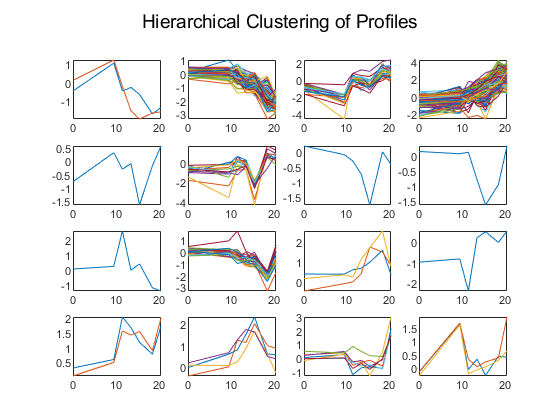



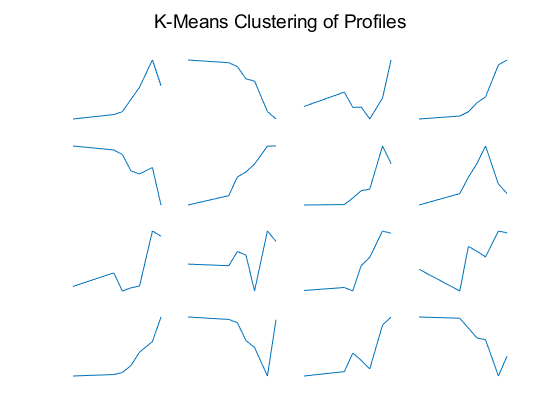

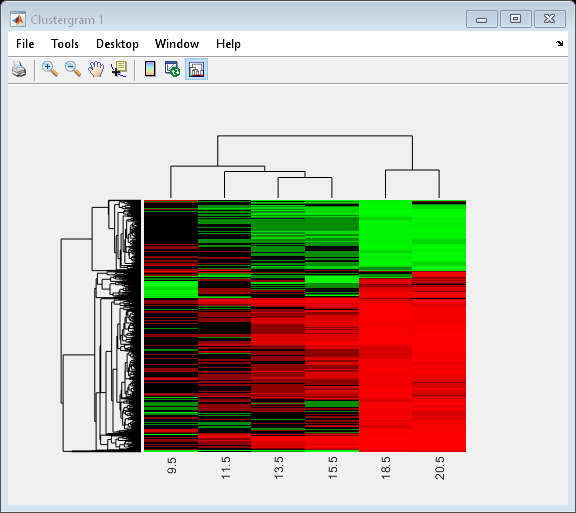

In [189]:
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
import scipy.spatial.distance as ssp
import scipy.cluster.hierarchy as hi

In [190]:
### Read the data and 
mat = loadmat('/Users/nafi/Documents/SBU-Courses/Fall-2018/CSE391/hw3/yeastdata.mat')


## convert data to pandas dataframe
df = pd.DataFrame(np.hstack ((mat["genes"], mat["yeastvalues"])))
## drop rows with null values
df = df.dropna()
df = df.drop( df[0] == "EMPTY" )
col = ["genes", "1", "2", "3", "4", "5","6", "7"]
df.columns = col
df = df.set_index("genes")
df.columns = mat["times"][0]


## Hierarchical clustering of yeast values over the time
corrDist = ssp.pdist(df, 'correlation')
clusterTree = hi.linkage(corrDist, method='average')
clusters = hi.fcluster(clusterTree, 16, criterion= 'maxclust')
#print(max(clusters) )
data = df
data = data.as_matrix()
plt.rcParams.update({'font.size': 12})

for c in range(1,17):
    plt.subplot(4,4,c);
    p = np.where(clusters==c)
    plt.plot(mat["times"][0], data[p].T )
    #axis tight
plt.title("Profiling of Hierarchical Clustering")
plt.show()





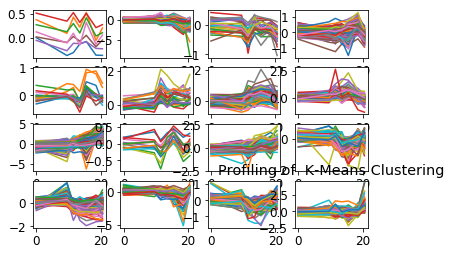

In [191]:
### KMeams Clustering with K=16
X = data
kmeans = KMeans(n_clusters=16, random_state=0).fit(X)
for c in range(1,17):
    plt.subplot(4,4,c);
    p = np.where(clusters==c)
    plt.plot(mat["times"][0], data[p].T )
    #axis tight
plt.title("Profiling of  K-Means Clustering")
plt.show()

In [195]:
## plotting all the centroids
centroid = kmeans.cluster_centers_
for c in range(1,16):
    plt.subplot(4,5,c+1)
    plt.plot(mat["times"][0],centroid[c,:])  
    plt.axis('off')
plt.title('K-Means Centroid')
plt.show()